# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". 

At the end of this project, we perform ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

After getting to know the data set quickly, we perform ***Exploratory Data Analysis***. We observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then we spesify the different variables to use for cluster analysis.

Finally, we cluster customers using the ***K-Means Clustering*** method, after that label the clusters.

---
---

## Tasks

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

#### 4. Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annul income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. We will segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv", index_col=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.columns = ["gender","age","income","spending"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gender    200 non-null    object
 1   age       200 non-null    int64 
 2   income    200 non-null    int64 
 3   spending  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis,we need to know the data well in order to label the observations correctly. We will analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable with data visualization techniques.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
income,200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
spending,200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


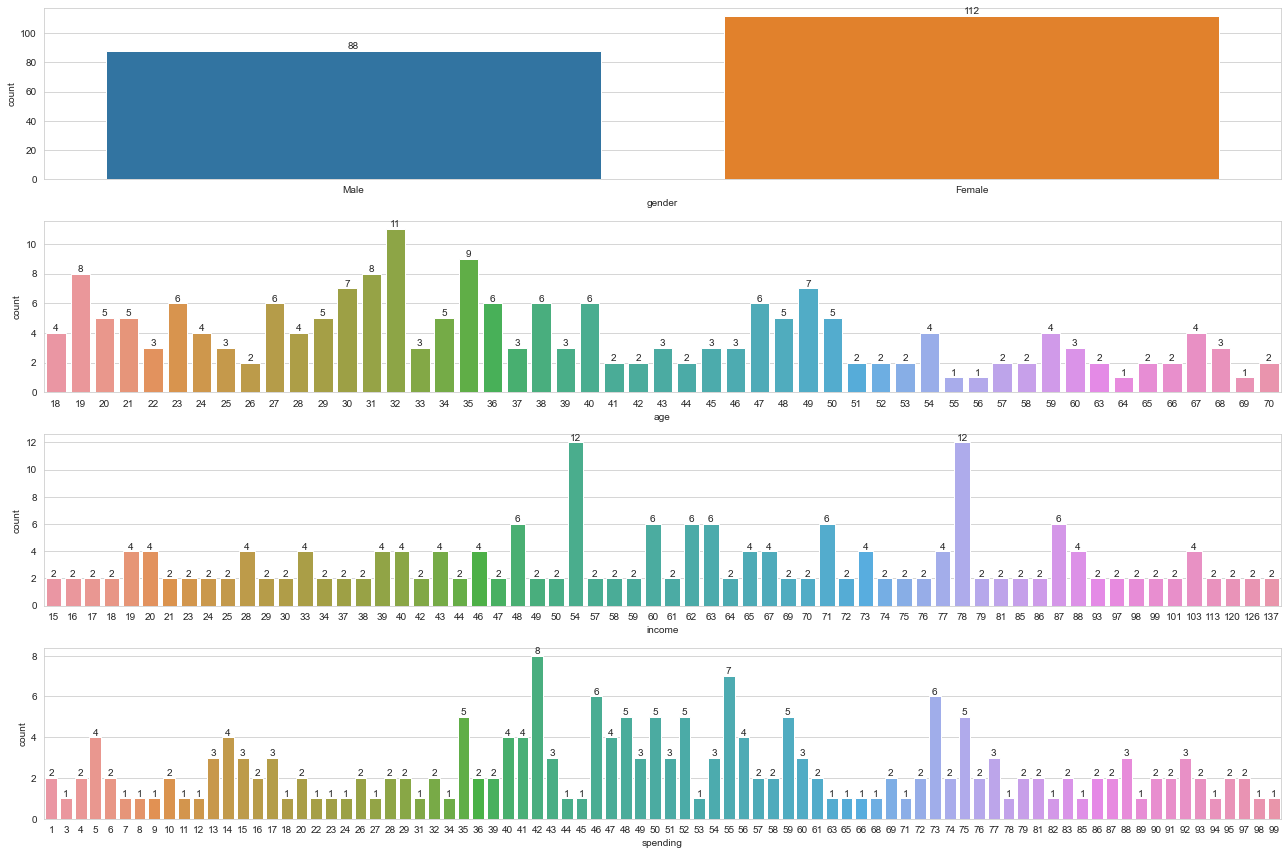

In [7]:
fig,ax = plt.subplots(nrows=len(df.columns),figsize=(18,12))

for i, col in enumerate(df.columns):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].bar_label(ax[i].containers[0])

plt.tight_layout()
plt.show;

Customer's ages are consantirated on the intervals 27-35 and income between 54-78 which is a modarate income. Spending of these customers also are modarate with 35-60.

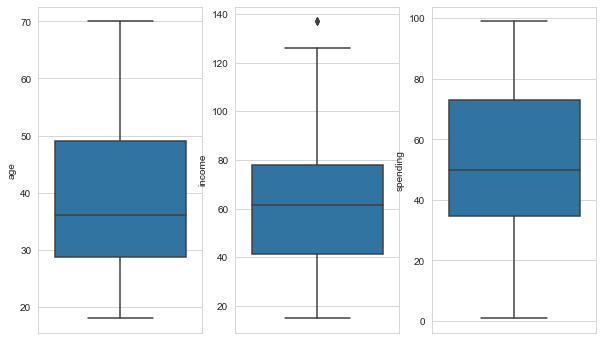

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=3)
sns.boxplot(y="age", data=df, ax=ax[0])
sns.boxplot(y="income", data=df, ax=ax[1])
sns.boxplot(y="spending", data=df, ax=ax[2])
plt.show()

#### Gender analysis

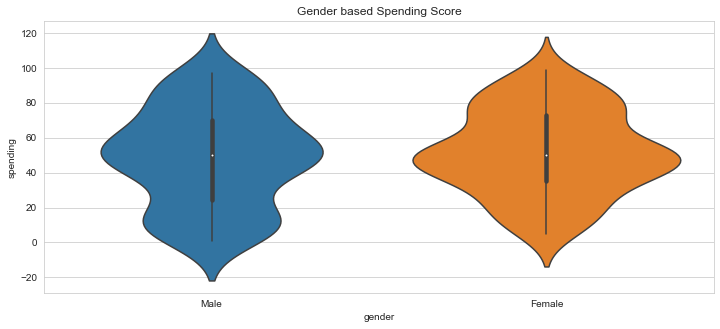

In [9]:
plt.figure(figsize=(12,5))
sns.violinplot(x='gender', y='spending', data=df)
plt.title('Gender based Spending Score')
plt.show()

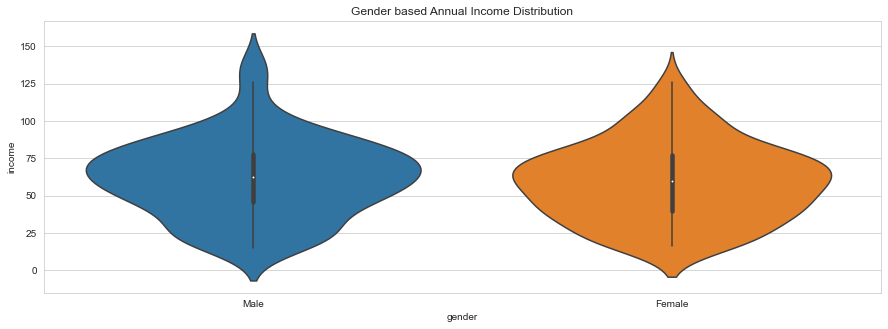

In [10]:
plt.figure(figsize=(15,5))
sns.violinplot(x='gender', y='income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

#### Age Analysis

Age clustering based on customer spendings

* 0-29  : Young
* 30-39 : Adult
* 40-54 : Mid-Age
* 55-   : Old

In [11]:
bins= [0,30,40,55,137]
labels = ['Young',"Adult", 'Mid_Age',"Old"]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

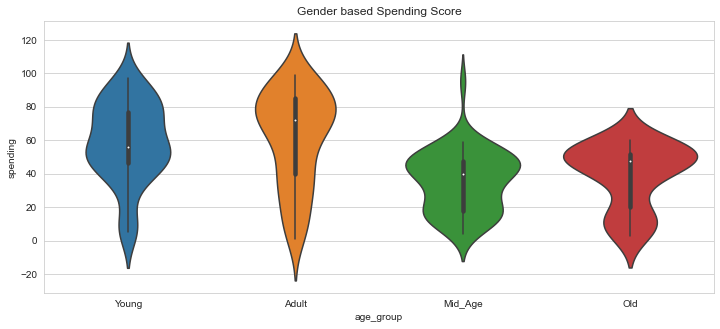

In [12]:
plt.figure(figsize=(12,5))
sns.violinplot(x='age_group', y='spending', data=df)
plt.title('Gender based Spending Score')
plt.show()

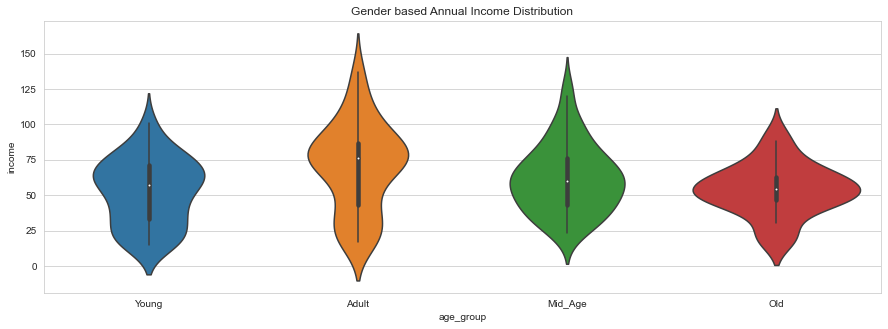

In [13]:
plt.figure(figsize=(15,5))
sns.violinplot(x='age_group', y='income', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

Young group has less income but more spendings while mid age and old customers' spending is less despite better income.

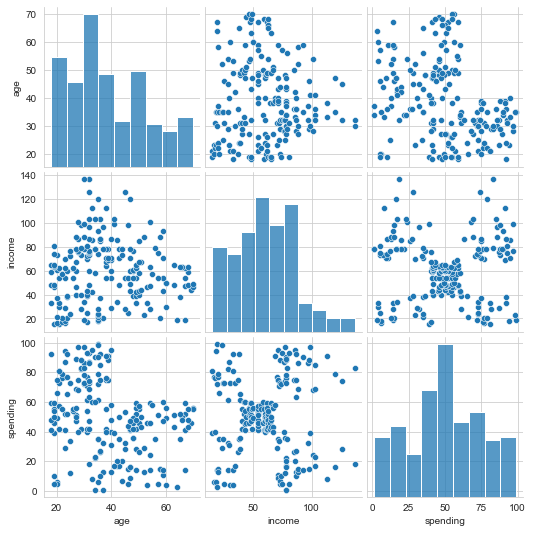

In [14]:
sns.pairplot(df);

We can see a clustring scheme between spending and income values.

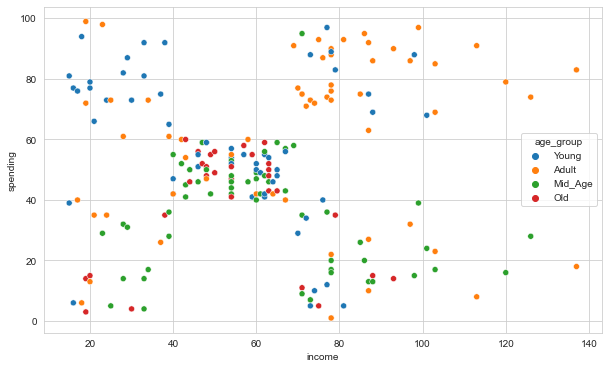

In [15]:
sns.scatterplot(x="income", y="spending", data=df, hue="age_group");

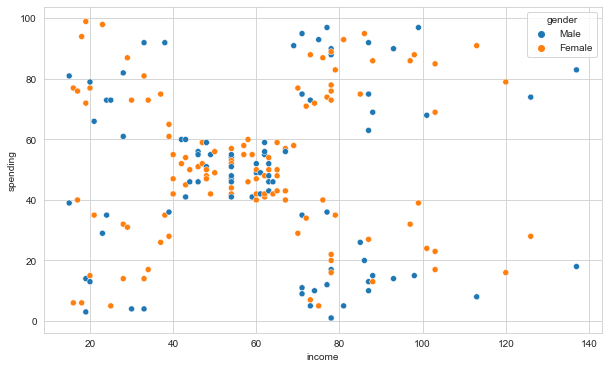

In [16]:
sns.scatterplot(x="income", y="spending", data=df, hue="gender");

<AxesSubplot:>

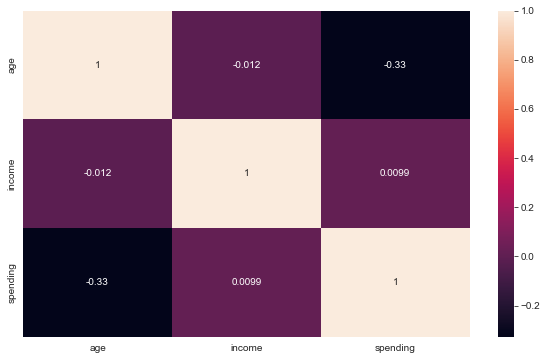

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
df.duplicated().any()

False

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

We perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If we use a maximum of two variables for each cluster analysis, we can identify cluster labels more clearly.

First, in K-Means algorithm we need to specify the number of clusters (*n_clusters*). We can determine the optimal number of clusters for each cluster analysis in various ways. In this case, we use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling is done as a result of each cluster analysis. 

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [19]:
df2 = df[["age","spending"]]

#### *ii. Determine optimal number of clusters*

In [20]:
from pyclustertend import hopkins
hopkins(df2, df2.shape[0])

0.3004548815072226

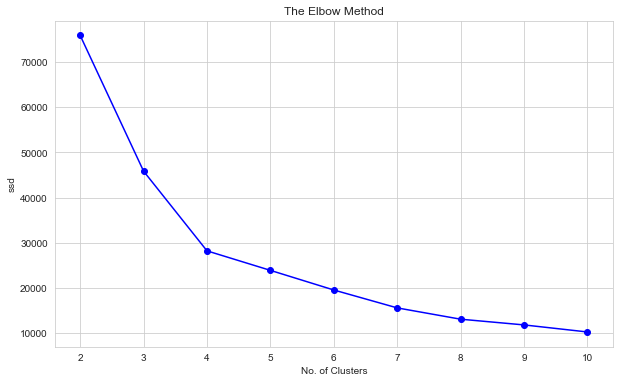

In [21]:

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(df2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [22]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479
3,17675.093
4,4327.335
5,4355.131
6,3968.925
7,2507.710
8,1268.463
9,1564.981


<AxesSubplot:>

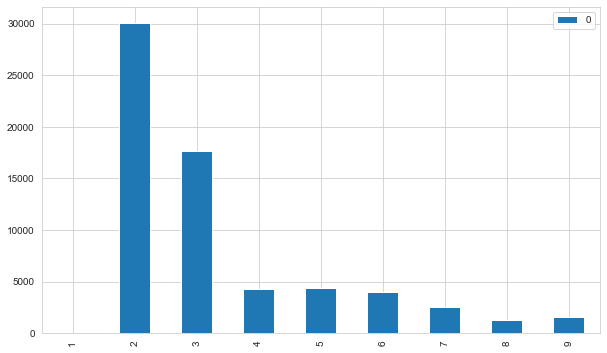

In [23]:
df_diff.plot(kind='bar')

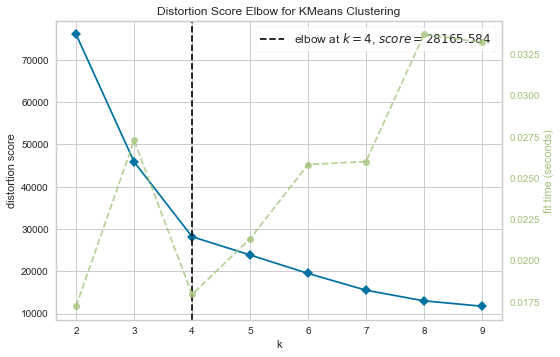

In [24]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df2)
visu.show();

In [25]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


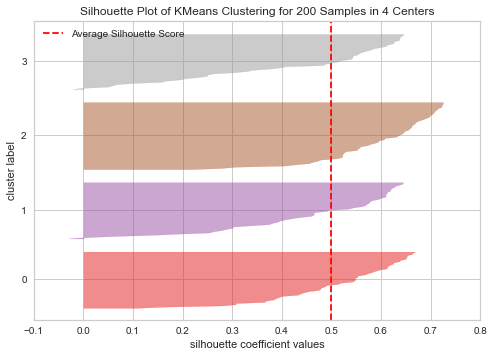

In [26]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df2)
visualizer.show();

In [27]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107


Selecting *n_clusters*=4 is a good choice

#### *iii. Apply K Means*

In [28]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit_predict(df2)
df2["cluster_kmeans"] = kmeans.fit_predict(df2)

#### *iv. Visualizing and Labeling All the Clusters*

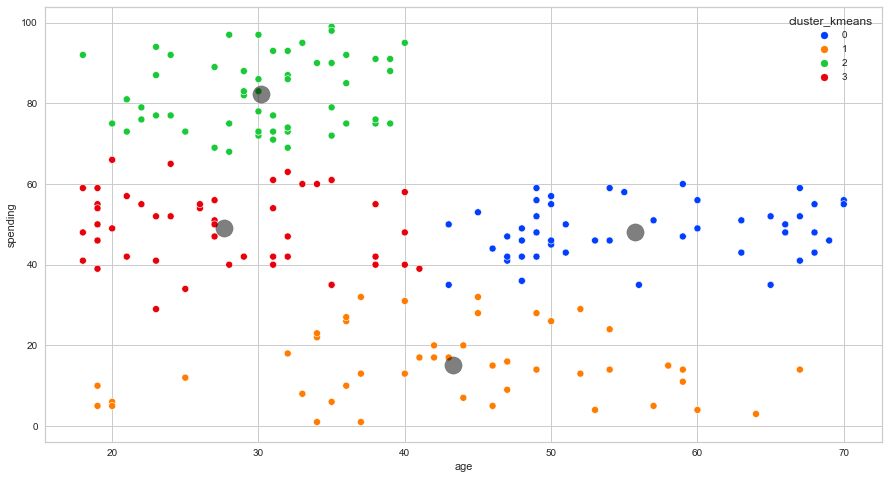

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age', y='spending', hue='cluster_kmeans', data=df2, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [30]:
df3 = df.loc[:,['income','spending']]

#### *ii. Determine optimal number of clusters*

In [31]:
hopkins(df3, df3.shape[0])

0.3113336592259126

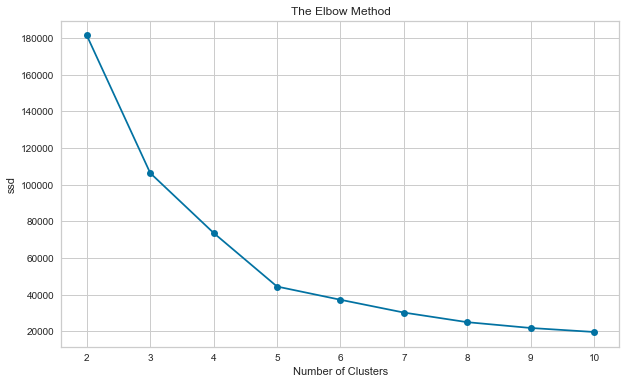

In [32]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

<AxesSubplot:>

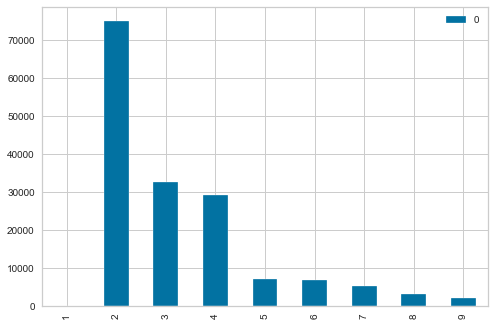

In [33]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff.plot(kind='bar')

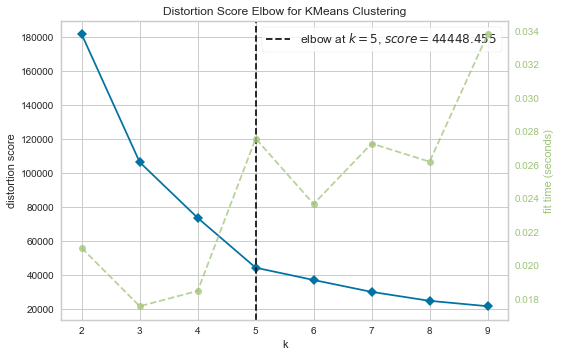

In [34]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df3)
visu.show();

In [35]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4565077334305076
For n_clusters=10, the silhouette score is 0.45925273534781125


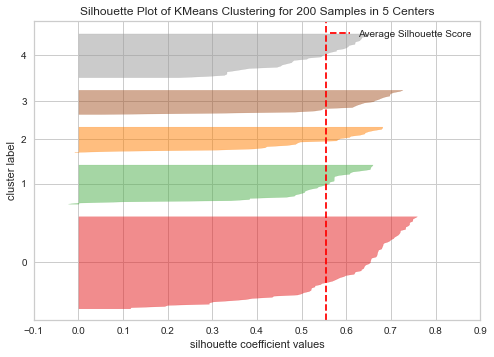

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(df3) 
visualizer.show();

Selecting *n_clusters*=5 is a good choice

#### *iii. Apply K Means*

In [37]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(df3)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [38]:
df3['cluster_kmeans'] = kmeans2.fit_predict(df3)

#### *iv. Visualizing and Labeling All the Clusters*

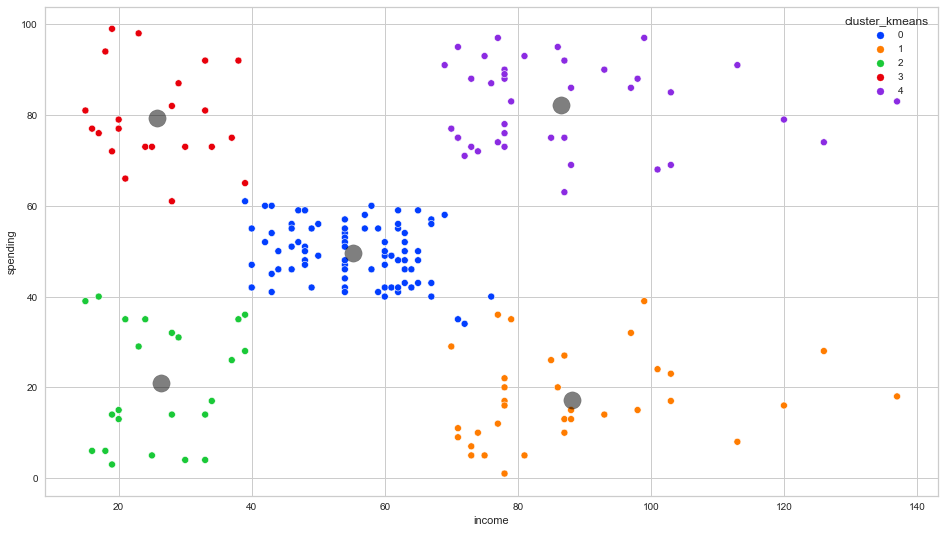

In [39]:
plt.figure(figsize=(16,9))
sns.scatterplot(x='income', y='spending', hue='cluster_kmeans', data=df3, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5);

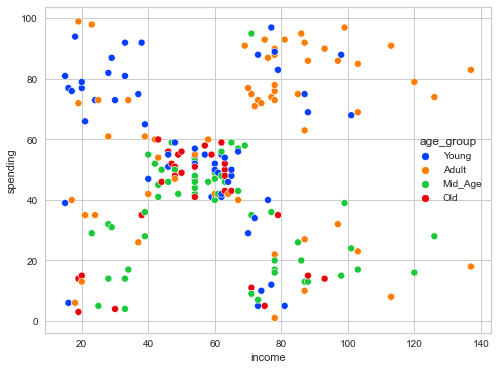

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='income', y='spending', hue='age_group', data=df, palette="bright");


### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

##### Clustering based on Age and Spending Score- (df2)

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [42]:
hc_method = ["ward","complete","average","single"]

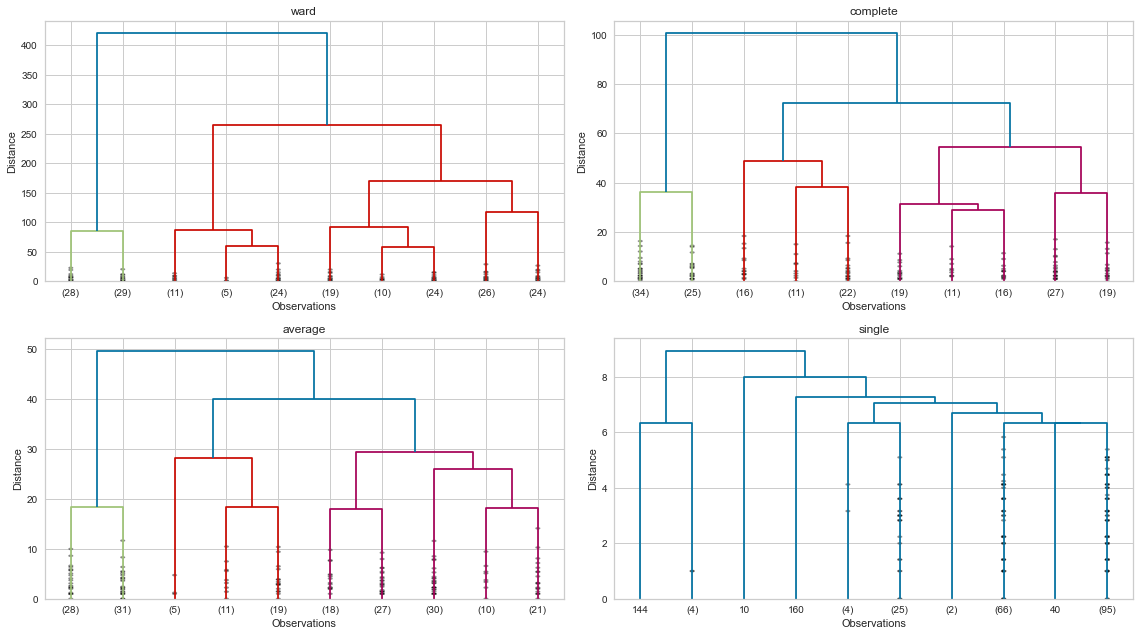

In [43]:
fig,axs = plt.subplots(ncols=2,nrows=2, figsize = (16,9))

for i, ax in enumerate(axs.flat):
    ax.set_title(hc_method[i])
    ax.set_xlabel("Observations")
    ax.set_ylabel("Distance")
    dendrogram(linkage(df2, hc_method[i]), truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10, ax=axs[i//2,i%2])
plt.tight_layout()
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(df2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


Selecting *n_clusters*=4 is a good choice

##### Clustering based on Annual Income and Spending Score- (df3)

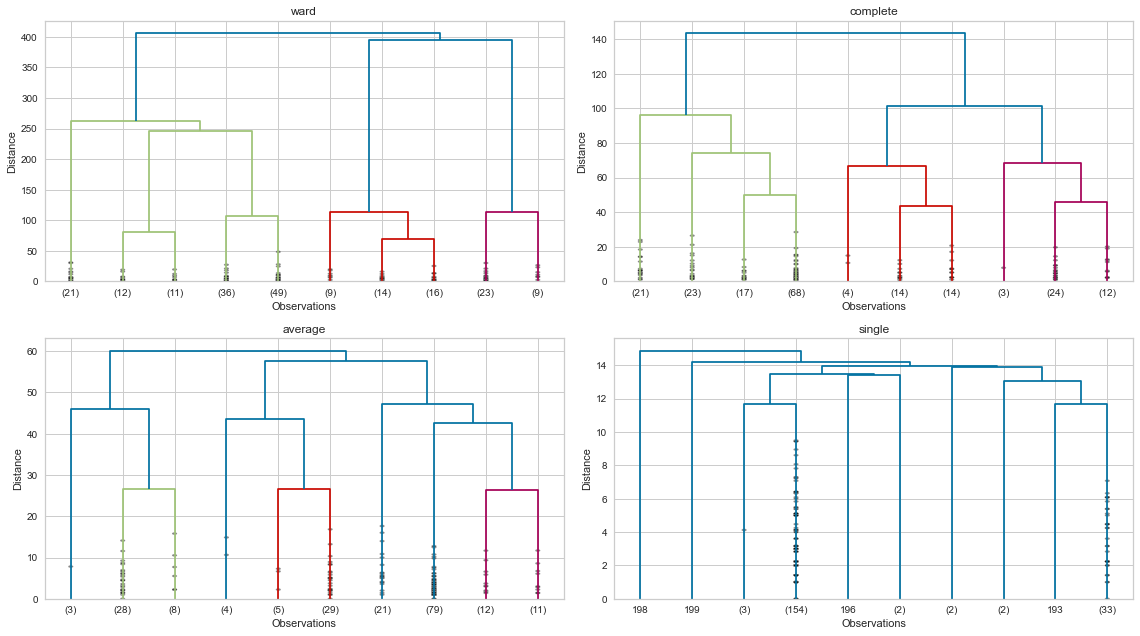

In [46]:
fig,axs = plt.subplots(ncols=2,nrows=2, figsize = (16,9))

for i, ax in enumerate(axs.flat):
    ax.set_title(hc_method[i])
    ax.set_xlabel("Observations")
    ax.set_ylabel("Distance")
    dendrogram(linkage(df3, hc_method[i]), truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10, ax=axs[i//2,i%2])
plt.tight_layout()
plt.show()

#### ii. *Apply Agglomerative Clustering*

##### Age and Spending Score- (df2)

In [47]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(df2)

df2['cluster_agg'] = y_agg
df2.head()

,age,spending,cluster_kmeans,cluster_agg
CustomerID,,,,
1,19,39,3,0
2,21,81,2,3
3,20,6,1,2
4,23,77,2,3
5,31,40,3,0


##### Annual Income and Spending Score- (df3)

In [48]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(df3)

df3['cluster_agg'] = y_agg2
df3.head()

,income,spending,cluster_kmeans,cluster_agg
CustomerID,,,,
1,15,39,2,4
2,15,81,3,3
3,16,6,2,4
4,16,77,3,3
5,17,40,2,4


#### *iii. Visualizing and Labeling All the Clusters* 

##### Age and Spending Score- (df2)

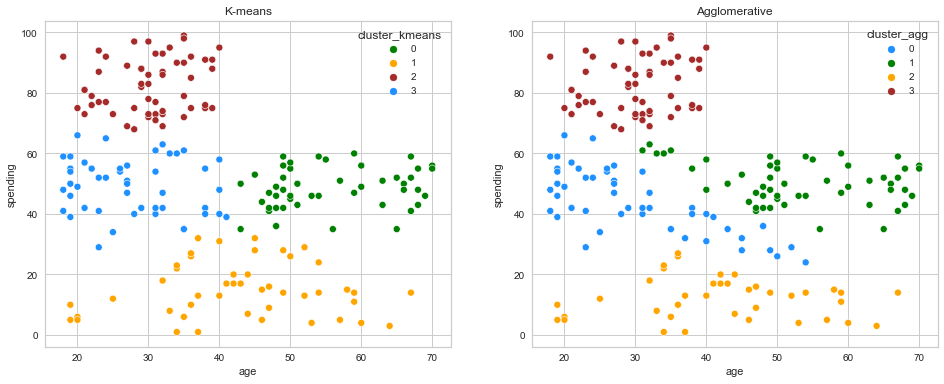

In [49]:
fig,ax = plt.subplots(ncols=2, figsize = (16,6))

sns.scatterplot(x='age', y='spending', hue='cluster_kmeans', ax=ax[0], 
                data=df2, palette=['green','orange','brown', 'dodgerblue'])
ax[0].set_title("K-means")

sns.scatterplot(x='age', y='spending', hue='cluster_agg', ax=ax[1], 
                data=df2, palette=['dodgerblue','green', 'orange','brown'])
ax[1].set_title("Agglomerative");

##### Annual Income and Spending Score- (df3)

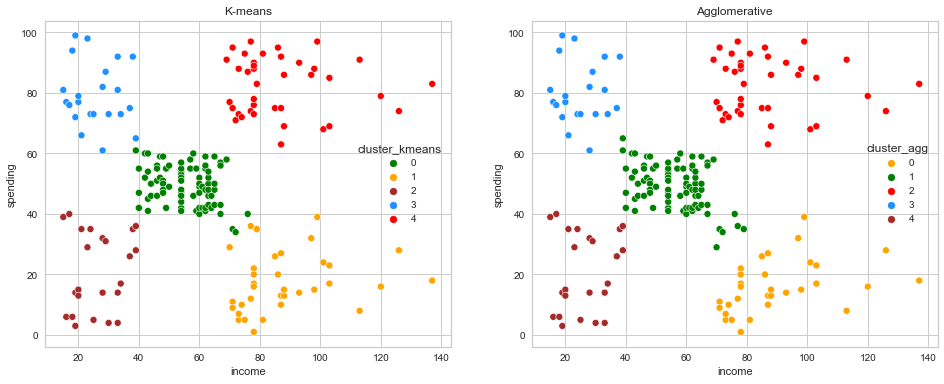

In [50]:
fig,ax = plt.subplots(ncols=2, figsize = (16,6))

sns.scatterplot(x='income', y='spending', hue='cluster_kmeans', ax=ax[0], 
                data=df3, palette=['green','orange','brown', 'dodgerblue','red'])
ax[0].set_title("K-means")

sns.scatterplot(x='income', y='spending', hue='cluster_agg', ax=ax[1], 
                data=df3, palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
ax[1].set_title("Agglomerative");


## 4. Conclusion

### Interpretation based on Age and Spending Score- (df2)

In [51]:
df2.head()

,age,spending,cluster_kmeans,cluster_agg
CustomerID,,,,
1,19,39,3,0
2,21,81,2,3
3,20,6,1,2
4,23,77,2,3
5,31,40,3,0


In [52]:
df["cluster_age_spending_score"] = df2.cluster_kmeans
df.head()

,gender,age,income,spending,age_group,cluster_age_spending_score
CustomerID,,,,,,
1,Male,19,15,39,Young,3
2,Male,21,15,81,Young,2
3,Female,20,16,6,Young,1
4,Female,23,16,77,Young,2
5,Female,31,17,40,Adult,3


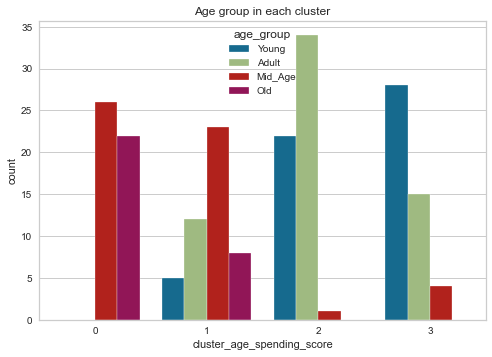

In [53]:
plt.title("Age group in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x="cluster_age_spending_score", data=df, hue="age_group")


In [54]:
df.groupby("cluster_age_spending_score").mean()

,age,income,spending
cluster_age_spending_score,,,
0,55.708,54.771,48.229
1,43.292,66.938,15.021
2,30.175,66.070,82.351
3,27.617,53.277,49.149


In [55]:
df.groupby("cluster_age_spending_score")["gender"].value_counts()

cluster_age_spending_score  gender
0                           Female    26
                            Male      22
1                           Female    24
                            Male      24
2                           Female    33
                            Male      24
3                           Female    29
                            Male      18
Name: gender, dtype: int64

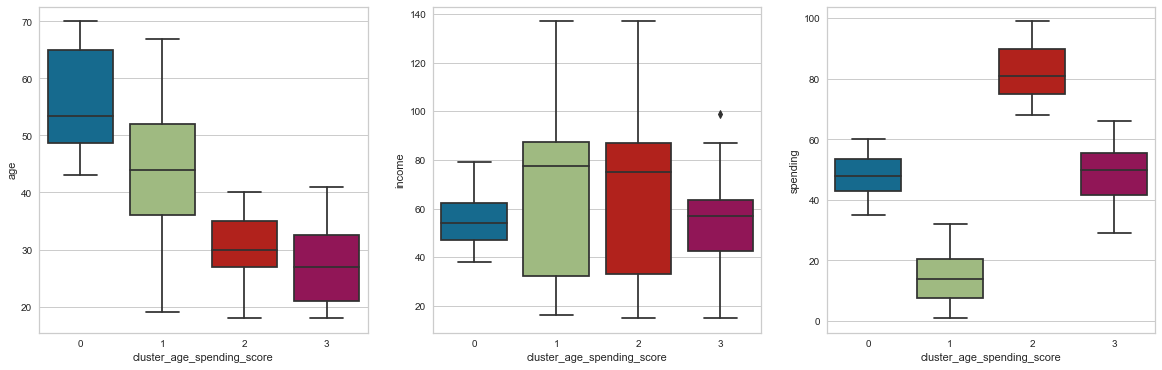

In [56]:
fig,ax = plt.subplots(ncols=3, figsize = (20,6))

sns.boxplot(y = "age", x = "cluster_age_spending_score", data = df, ax=ax[0])
sns.boxplot(y = "income", x = "cluster_age_spending_score",  data = df, ax=ax[1])
sns.boxplot(y = "spending", x = "cluster_age_spending_score", data = df, ax=ax[2]);

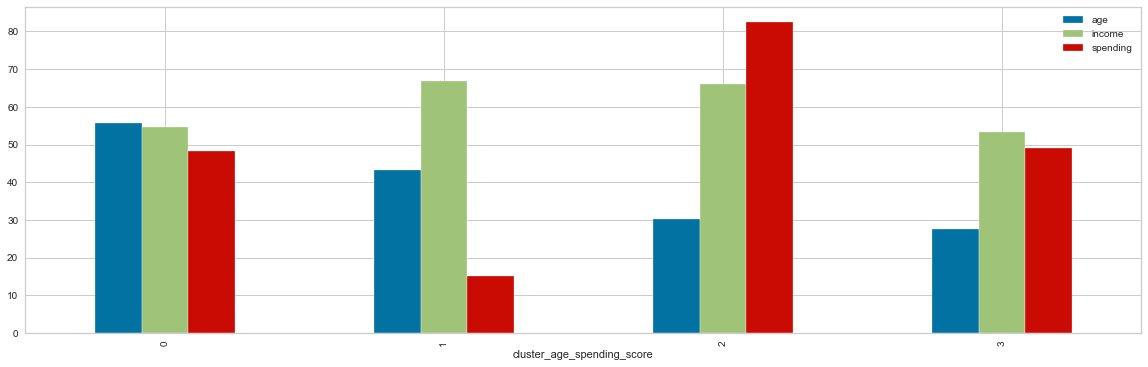

In [57]:
df.groupby("cluster_age_spending_score").mean().plot(kind='bar', figsize = (20,6));

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

### Interpretation based on Annual Income and Spending Score- (df3)

In [58]:
df3.head()

,income,spending,cluster_kmeans,cluster_agg
CustomerID,,,,
1,15,39,2,4
2,15,81,3,3
3,16,6,2,4
4,16,77,3,3
5,17,40,2,4


In [59]:
df.drop(columns= "cluster_age_spending_score", inplace=True)

In [60]:
df["cluster_annual_income_spending_score"] = df3.cluster_kmeans
df.head()

,gender,age,income,spending,age_group,cluster_annual_income_spending_score
CustomerID,,,,,,
1,Male,19,15,39,Young,2
2,Male,21,15,81,Young,3
3,Female,20,16,6,Young,2
4,Female,23,16,77,Young,3
5,Female,31,17,40,Adult,2


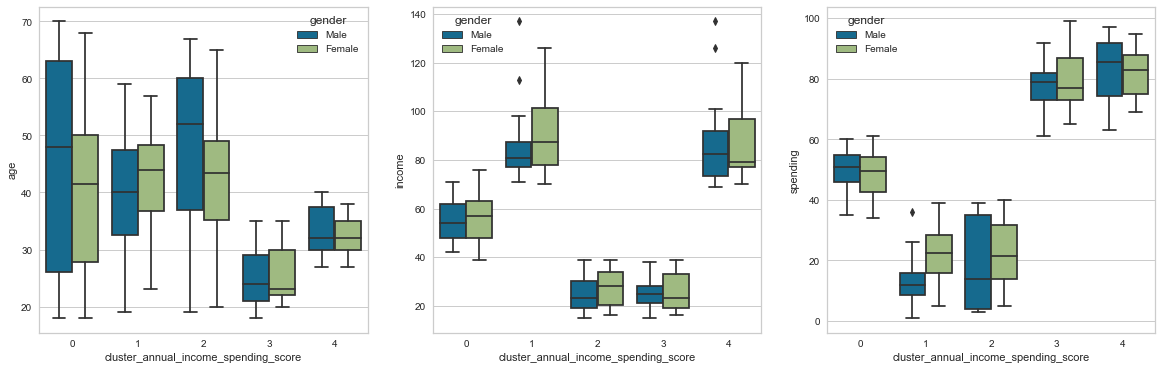

In [61]:
fig,ax = plt.subplots(ncols=3, figsize = (20,6))

sns.boxplot(y = "age", x = "cluster_annual_income_spending_score", data = df, ax=ax[0], hue="gender")
sns.boxplot(y = "income", x = "cluster_annual_income_spending_score",  data = df, ax=ax[1], hue="gender")
sns.boxplot(y = "spending", x = "cluster_annual_income_spending_score", data = df, ax=ax[2], hue="gender");

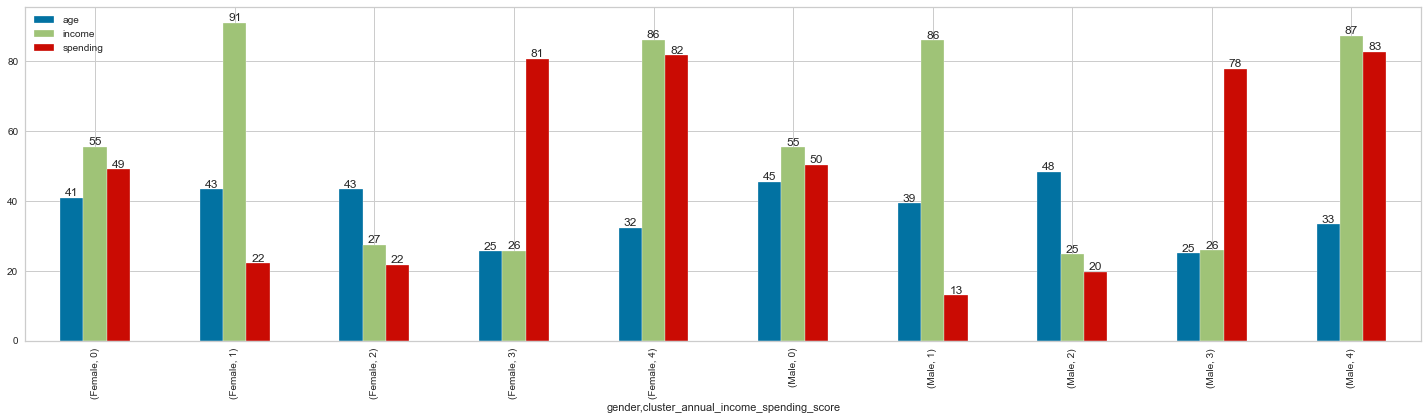

In [62]:
ax = df.groupby(["gender", "cluster_annual_income_spending_score"]).mean().plot(kind="bar", figsize=(20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")
plt.tight_layout()

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

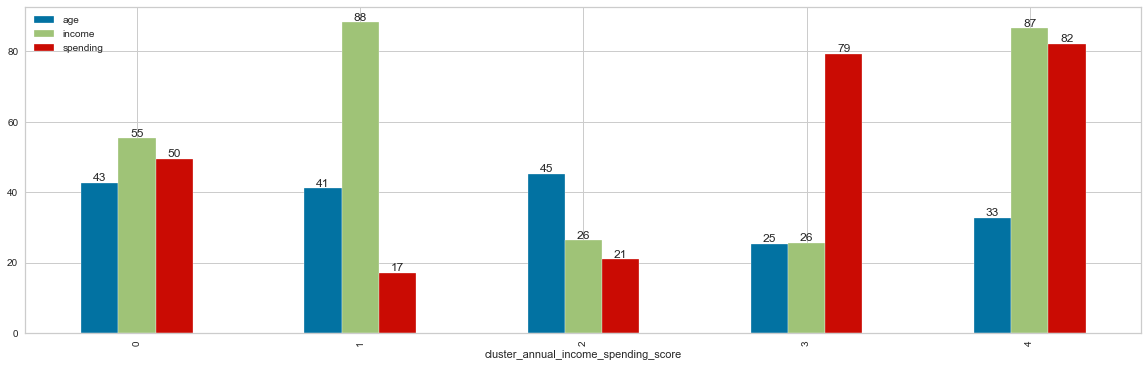

In [63]:
ax = df.groupby("cluster_annual_income_spending_score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___